In [4]:
from modsim import *

In [12]:
init_state = State(s=89, i=1, r=0)
show(init_state)

,state
s,89
i,1
r,0


In [13]:
init_state /= init_state.sum()
show(init_state)

,state
s,0.988889
i,0.011111
r,0.000000


In [14]:
tc = 3 # time between contacts in days
tr = 4 # recovery time in days
beta = 1 / tc
gamma = 1 / tr

In [25]:
def make_system(beta, gamma) -> System:
    init = State(s=89, i=1, r=0)
    init /= init.sum()
    return System(init=init, t_end=7*14, beta=beta, gamma=gamma)

In [26]:
system = make_system(beta, gamma)
show(system)

,value
init,s 0.988889 i 0.011111 r 0.000000 Name...
t_end,98
beta,0.333333
gamma,0.25


In [27]:
def update_func(t, state, system):
    s, i, r = state.s, state.i, state.r
    infected = system.beta * i * s
    recovered = system.gamma * i
    s -= infected
    i += infected - recovered
    r += recovered
    return State(s=s, i=i, r=r)

In [28]:
state = update_func(0, system.init, system)
show(state)

,state
s,0.985226
i,0.011996
r,0.002778


In [29]:
def run_simulation1(system, update_func):
    state = system.init
    for t in range(0, system.t_end):
        state = update_func(t, state, system)
    
    return state

In [30]:
final_state = run_simulation1(system, update_func)
show(final_state)

,state
s,0.520568
i,0.000666
r,0.478766


In [37]:
def run_simulation2(system, update_func):
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()
    state = system.init
    S[0], I[0], R[0] = state.s, state.i, state.r
    for t in range(0, system.t_end):
        state = update_func(t, state, system)
        S[t+1], I[t+1], R[t+1] = state.s, state.i, state.r

    return S, I, R

In [39]:
S, I, R = run_simulation2(system, update_func)


In [46]:
def plot_results(S, I, R):
    S.plot(style='--', label='Susceptible')
    I.plot(style='-', label='Infected')
    R.plot(style=':', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

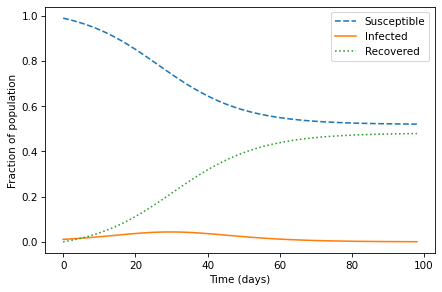

In [47]:
plot_results(S, I, R)

In [49]:
def run_simulation3(system, update_func):
    frame = TimeFrame(columns=system.init.index)
    frame.loc[0] = system.init
    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)
    return frame

In [50]:
results3 = run_simulation3(system, update_func)
results3.head()

,s,i,r
0,0.988889,0.011111,0.000000
1,0.985226,0.011996,0.002778
2,0.981287,0.012936,0.005777
3,0.977055,0.013934,0.009011
4,0.972517,0.014988,0.012494


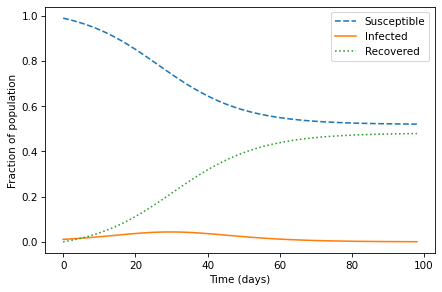

In [51]:
plot_results(results3.s, results3.i, results3.r)

In [52]:
# exercise 11.1
# Suppose the time between contacts is four days and the recovery time is five days. 
# After 14 weeks, how many students have been infected in total?
tc = 4
tr = 5
beta = 1 / tc
gamma = 1 / tr
system = make_system(beta, gamma)
results = run_simulation3(system, update_func)
total_infected = results.r[system.t_end] * 90
total_infected

np.float64(34.66411358285048)

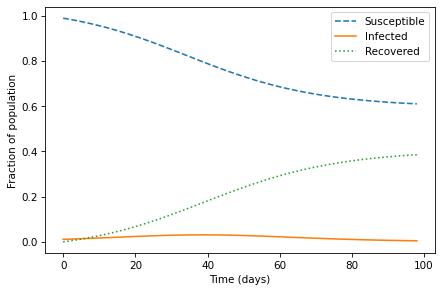

In [53]:
plot_results(results.s, results.i, results.r)